In this tutorial, I explain why the UDCT transform needs only half of the frequency plane if the input is real, and what are the conditions on the curvelet windows in frequency domain. Let import some libraires and the fun_meyer function to create windows.

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

def fun_meyer(x, param):

    p = np.array([-20,70,-84, 35, 0, 0, 0, 0])
    # x = np.linspace(0,5)
    y = np.ones_like(x)

    y[x <= param[0] ] = 0.
    y[x >= param[3] ] = 0.
    xx = (x[ (x >= param[0]) & (x <= param[1]) ] -param[0] ) /(param[1]-param[0])
    y[ (x >= param[0]) & (x <= param[1]) ] = np.polyval( p, xx)
    xx = (x[ (x >= param[2]) & (x <= param[3]) ] - param[3] ) /(param[2]-param[3])
    y[ (x >= param[2]) & (x <= param[3]) ] = np.polyval( p, xx)
    return y.reshape(x.shape)


Now let create a random signal and its Fourier domain by FFT. The Fourier transform by FFT is symmetric around zero frequency, and the print out shows that they are complex conjugate between elements 1 and (N-1), 2 and (N-2) ...

[  4.0663129  +0.j           4.71242732-13.54387625j
  -8.26873537 -0.55215441j -11.61045541 +5.99548447j
  -0.02068836-19.83842395j]
[  0.9520544  +9.55485018j  -0.02068836+19.83842395j
 -11.61045541 -5.99548447j  -8.26873537 +0.55215441j
   4.71242732+13.54387625j]


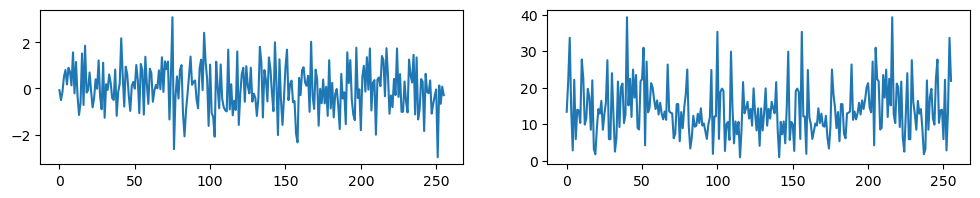

In [7]:
N = 256
sig = np.random.randn(N)
plt.figure(figsize = (12,2))
plt.subplot(121)
plt.plot(sig)

fsig = np.fft.fft(sig)
plt.subplot(122)
plt.plot(np.fft.fftshift(np.abs(fsig)))
print(" Complex conjugate frequencies :")
print(fsig[:5])
print(fsig[-5:])

Now I create a window that mostly covers half of the frequency plane. The window adds with its mirror through zero frequency equal to 1.

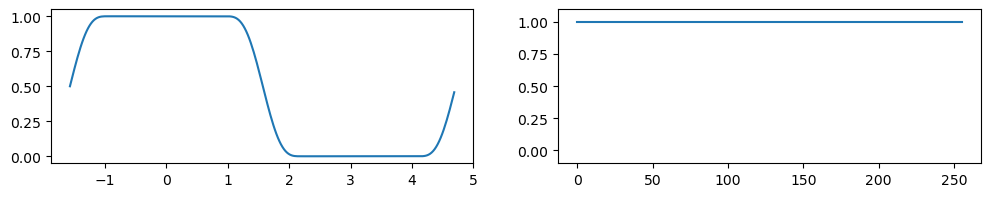

In [22]:
sp = 2*np.pi/N 
grid = -np.pi/2 + np.linspace(0, 2*np.pi - sp, N)
prmfilt = np.pi*np.array( [-0.2, 0.2, 0.8, 1.2])
ff = fun_meyer(grid, prmfilt)
ff = np.roll(ff, 3*N//4)

plt.figure(figsize = (12,2))

plt.subplot(121)
plt.plot(grid, ff)

fsig = np.fft.fft(sig)
plt.subplot(122)
ffflip = np.roll(ff[::-1],1)
ax = plt.gca()
ax.set_ylim([-0.1, 1.1])
plt.plot(ff +ffflip)


Now I multiply the window by 2, as a scaling factor. The window is then multiplied with the Fourier domain signal, and then the windowed signal is inverse FFT , but I kept only the real part. As the print out shows, the original values and the reconstructed values are the same

In [23]:
ff = 2*ff
fsigwin = fsig*ff

rsig = np.real(np.fft.ifft(fsigwin))
print(sig[:5])
print(rsig[:5])

[-0.07786826 -0.50555921 -0.14943731  0.50843375  0.80059022]
[-0.07786826 -0.50555921 -0.14943731  0.50843375  0.80059022]
